<a href="https://colab.research.google.com/github/fer3her/vision-con-IA/blob/main/rreto1imagens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Reto ‚ÄúIm√°genes y filtrado‚Äù**
Definir una secuencia de al menos 5  im√°genes de sat√©lite de diferentes fechas de la misma escena. Todos los estudiantes o grupos que conformen deben definir ubicaci√≥n geogr√°fica diferente.
* Puede tomar una sola polarizaci√≥n si lo desea (VV o VH), la que m√°s le suministre informaci√≥n relevante para ustedes.
* Re-escalice la imagen para poder visualizarla.
* Use como apoyo el Repositorio github para rescalizado, registro y recorte como apoyo.
* No las recorte ni registre, eso va para el siguiente reto.
* Filtrar las im√°genes, ya que originalmente poseen un ruido denominado speckle. Elija un filtro que considere apropiado.
* Analizar el filtrado visualmente, haciendo zoom sobre regiones de inter√©s, observando detalles, etc.
Obtener resultados y conclusiones.


In [ ]:
# PASO 1: Librer√≠as necesarias
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

# PASO 3: Definir carpeta de im√°genes
basepath = r'C:\Users\Usuario\Downloads\Imagenes reto 3 parcial -20250404T162556Z-001'

# PASO 4: Lista de nombres de 5 im√°genes SAR (cambia por tus propias im√°genes)
imagenes = [
    'Imagenes reto 3 parcial/s1a-iw-grd-vh-20250228t065516-20250228t065541-058093-072c89-002.tiff',
    'Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065541-20250324t065606-058443-073a8a-002.tiff',
    'Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065541-20250312t065606-058268-0733a0-002.tiff',
    'Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065516-20250324t065541-058443-073a8a-002.tiff',
    'Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065516-20250312t065541-058268-0733a0-002.tiff'
]

In [ ]:

# PASO 5: Funci√≥n para reescalar imagen
def reescalar_img(img):
    img2 = img.astype(np.float32)
    escala_display = np.mean(img2) * 3.0
    min_val = np.min(img2)
    img2[img2 > escala_display] = escala_display
    img2[img2 < min_val] = 0
    img3 = 255.0 * (img2 / escala_display)
    img4 = img3.astype(np.uint8)
    return img4

# PASO 6: Filtro Lee
def filtro_lee(img, size=5):
    img = img.astype(np.float32)
    mean = cv2.blur(img, (size, size))
    mean_sq = cv2.blur(img**2, (size, size))
    variance = mean_sq - mean**2
    overall_variance = np.mean(variance)
    weights = variance / (variance + overall_variance)
    filtered = mean + weights * (img - mean)
    return filtered.astype(np.uint8)

In [ ]:
import os
import cv2
import numpy as np
import gc  # Garbage collector

# Procesar y guardar las im√°genes
for nombre in imagenes:
    print(f'\nProcesando imagen: {nombre}')

    # Cargar imagen
    path_img = os.path.join(basepath, nombre)
    img = cv2.imread(path_img, cv2.IMREAD_UNCHANGED)

    if img is None:
        print(f'‚ùå Error al cargar la imagen: {nombre}')
        continue

    # Mostrar info b√°sica
    print('‚úÖ Imagen cargada')
    print('Shape:', img.shape, 'Tipo:', img.dtype)
    print('M√°x:', np.max(img), 'Promedio:', np.mean(img), 'M√≠n:', np.min(img))

    # Reescalar y filtrar
    img_reescalada = reescalar_img(img)
    img_filtrada = filtro_lee(img_reescalada)

    # Guardar im√°genes procesadas
    nombre_scaled = nombre.replace('.tiff', '_scaled.tiff')
    nombre_filtrada = nombre.replace('.tiff', '_filtrada.tiff')
    cv2.imwrite(os.path.join(basepath, nombre_scaled), img_reescalada)
    cv2.imwrite(os.path.join(basepath, nombre_filtrada), img_filtrada)

    print('‚úÖ Im√°genes guardadas correctamente')

    # Liberar memoria
    del img, img_reescalada, img_filtrada
    gc.collect()



Procesando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250228t065516-20250228t065541-058093-072c89-002.tiff
‚úÖ Imagen cargada
Shape: (16660, 25736) Tipo: uint16
M√°x: 8357 Promedio: 36.80938191409607 M√≠n: 0
‚úÖ Im√°genes guardadas correctamente

Procesando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065541-20250324t065606-058443-073a8a-002.tiff
‚úÖ Imagen cargada
Shape: (16661, 25724) Tipo: uint16
M√°x: 9566 Promedio: 47.02231069401724 M√≠n: 0
‚úÖ Im√°genes guardadas correctamente

Procesando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065541-20250312t065606-058268-0733a0-002.tiff
‚úÖ Imagen cargada
Shape: (16661, 25727) Tipo: uint16
M√°x: 9052 Promedio: 50.62944832035445 M√≠n: 0
‚úÖ Im√°genes guardadas correctamente

Procesando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065516-20250324t065541-058443-073a8a-002.tiff
‚úÖ Imagen cargada
Shape: (16661, 25734) Tipo: uint16
M√°x: 8314 Promedio: 34.917699784305775 M√≠n: 0
‚úÖ Im√°genes guardadas corre

Durante el procesamiento de las im√°genes Sentinel-1 en polarizaci√≥n VH, se observaron dimensiones consistentes entre todas las escenas (~16660 x ~25730 p√≠xeles) y un rango din√°mico amplio, con valores m√°ximos entre 8000 y 9500. Los valores promedio de retrodispersi√≥n variaron entre aproximadamente 34 y 50, lo cual sugiere diferencias en la cobertura del terreno o en las condiciones ambientales al momento de la captura. En particular, la imagen del 12 de marzo present√≥ el valor promedio m√°s alto, lo que podr√≠a indicar mayor presencia de vegetaci√≥n o humedad. Estos resultados permiten identificar la riqueza de informaci√≥n contenida en las im√°genes radar, y son fundamentales para ajustar correctamente los par√°metros en procesos de filtrado, clasificaci√≥n o detecci√≥n de superficies


üîç Visualizando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250228t065516-20250228t065541-058093-072c89-002.tiff


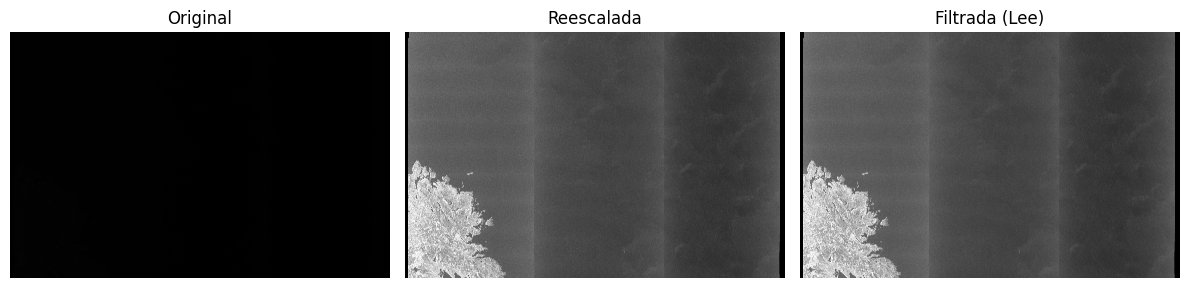


üîç Visualizando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065541-20250324t065606-058443-073a8a-002.tiff


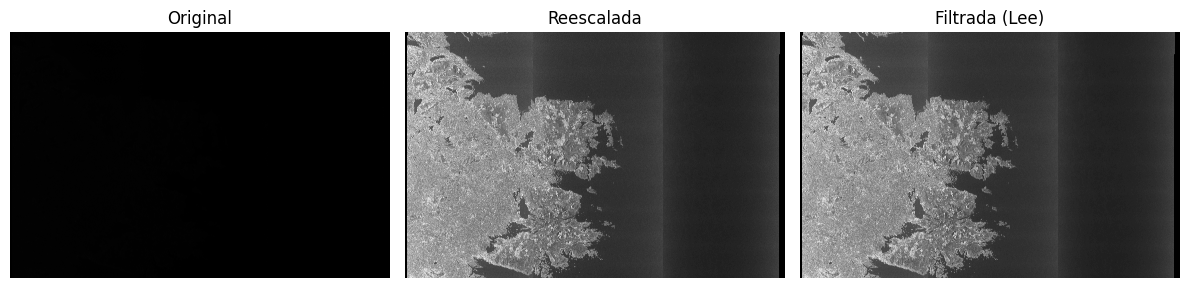


üîç Visualizando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065541-20250312t065606-058268-0733a0-002.tiff


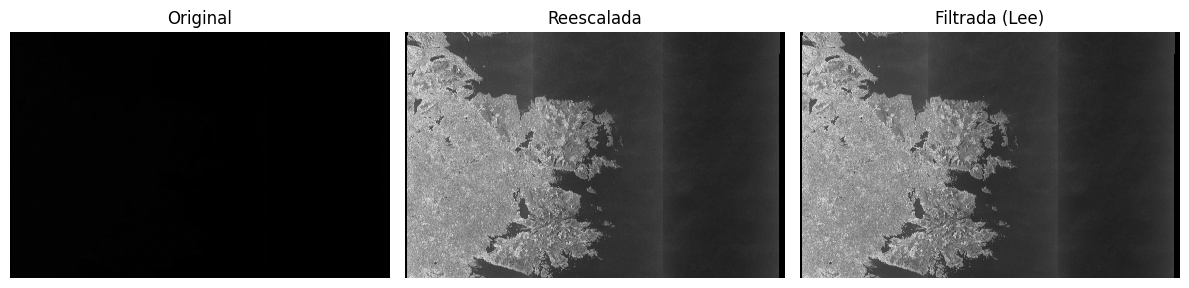


üîç Visualizando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065516-20250324t065541-058443-073a8a-002.tiff


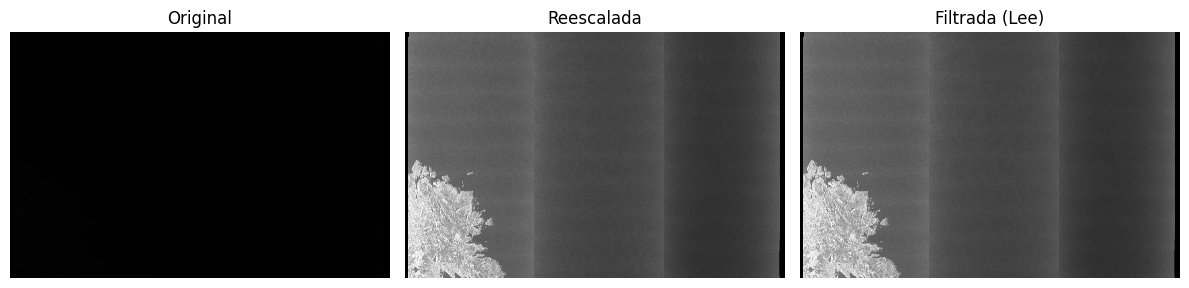


üîç Visualizando imagen: Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065516-20250312t065541-058268-0733a0-002.tiff


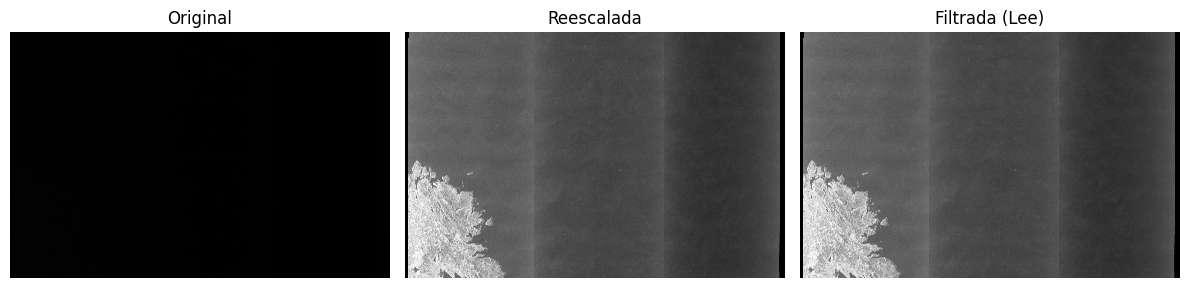

In [ ]:
import matplotlib.pyplot as plt
import gc  # Aseg√∫rate de tenerlo importado

# Visualizaci√≥n de im√°genes procesadas
for nombre in imagenes:
    print(f'\nüîç Visualizando imagen: {nombre}')

    path_original = os.path.join(basepath, nombre)
    path_scaled = os.path.join(basepath, nombre.replace('.tiff', '_scaled.tiff'))
    path_filtrada = os.path.join(basepath, nombre.replace('.tiff', '_filtrada.tiff'))

    # Cargar im√°genes
    img = cv2.imread(path_original, cv2.IMREAD_UNCHANGED)
    img_reescalada = cv2.imread(path_scaled, cv2.IMREAD_UNCHANGED)
    img_filtrada = cv2.imread(path_filtrada, cv2.IMREAD_UNCHANGED)

    if img is None or img_reescalada is None or img_filtrada is None:
        print('‚ö†Ô∏è No se pudo cargar una o m√°s im√°genes.')
        continue

    # Mostrar im√°genes
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Original')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(img_reescalada, cmap='gray')
    plt.title('Reescalada')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(img_filtrada, cmap='gray')
    plt.title('Filtrada (Lee)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Liberar memoria tras mostrar
    plt.close('all')
    del img, img_reescalada, img_filtrada
    gc.collect()


La comparaci√≥n entre las tres im√°genes muestra claramente la importancia del preprocesamiento en datos radar. La imagen original presenta un bajo contraste, lo que dificulta la identificaci√≥n de elementos geogr√°ficos. Al aplicar la reescalaci√≥n, se mejora significativamente la visibilidad de detalles como cuerpos de agua, zonas urbanas y vegetaci√≥n. Finalmente, con la aplicaci√≥n del filtro de Lee, se reduce el ruido speckle caracter√≠stico de las im√°genes radar sin perder informaci√≥n relevante, lo que permite una visualizaci√≥n m√°s limpia y adecuada para tareas de an√°lisis y clasificaci√≥n


ZOOM sobre regi√≥n de inter√©s - Imagenes reto 3 parcial/s1a-iw-grd-vh-20250228t065516-20250228t065541-058093-072c89-002.tiff


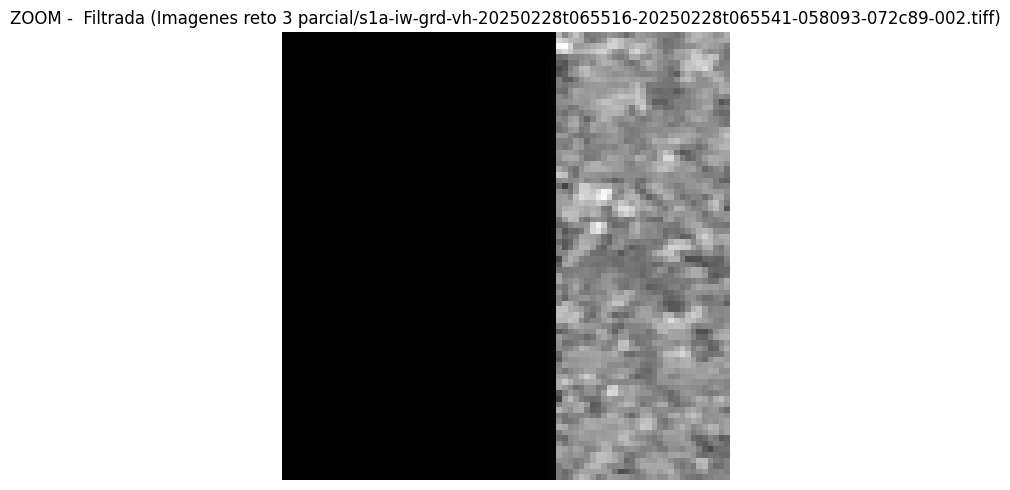


ZOOM sobre regi√≥n de inter√©s - Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065541-20250324t065606-058443-073a8a-002.tiff


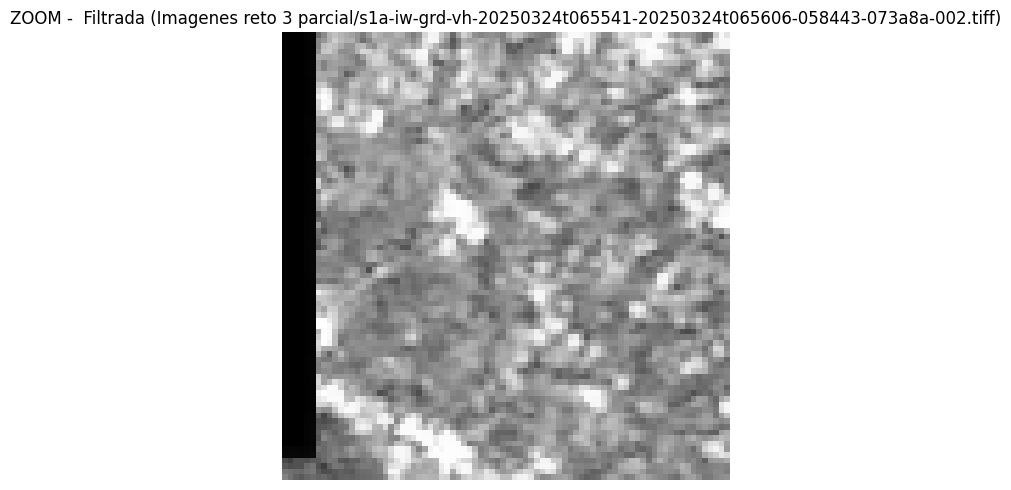


ZOOM sobre regi√≥n de inter√©s - Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065541-20250312t065606-058268-0733a0-002.tiff


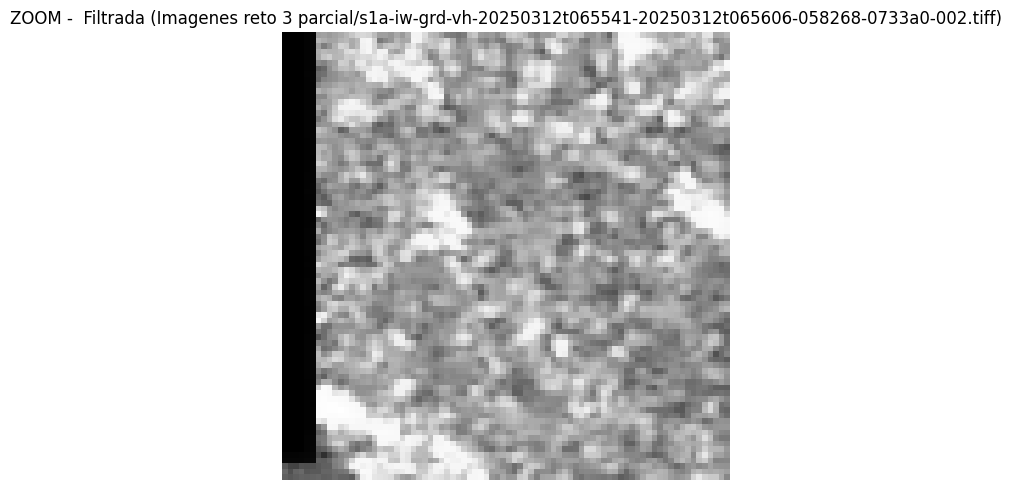


ZOOM sobre regi√≥n de inter√©s - Imagenes reto 3 parcial/s1a-iw-grd-vh-20250324t065516-20250324t065541-058443-073a8a-002.tiff


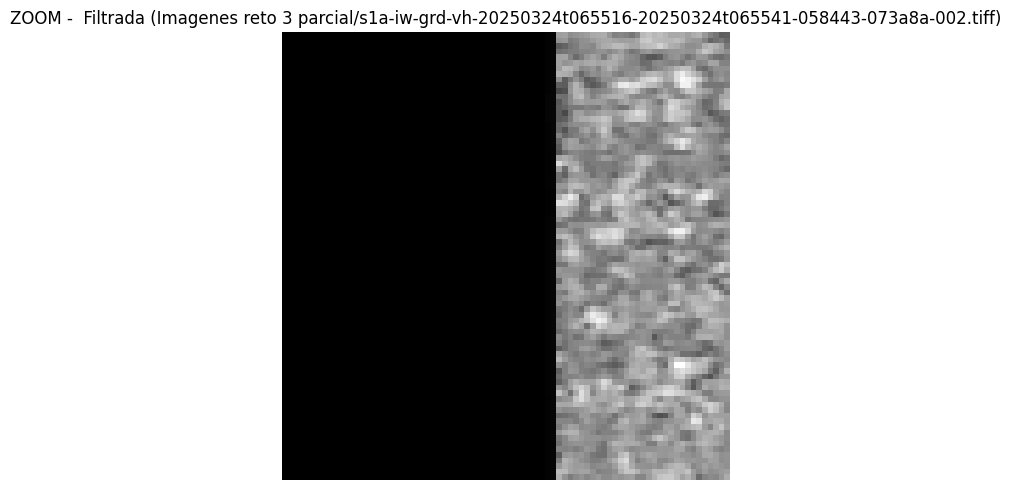


ZOOM sobre regi√≥n de inter√©s - Imagenes reto 3 parcial/s1a-iw-grd-vh-20250312t065516-20250312t065541-058268-0733a0-002.tiff


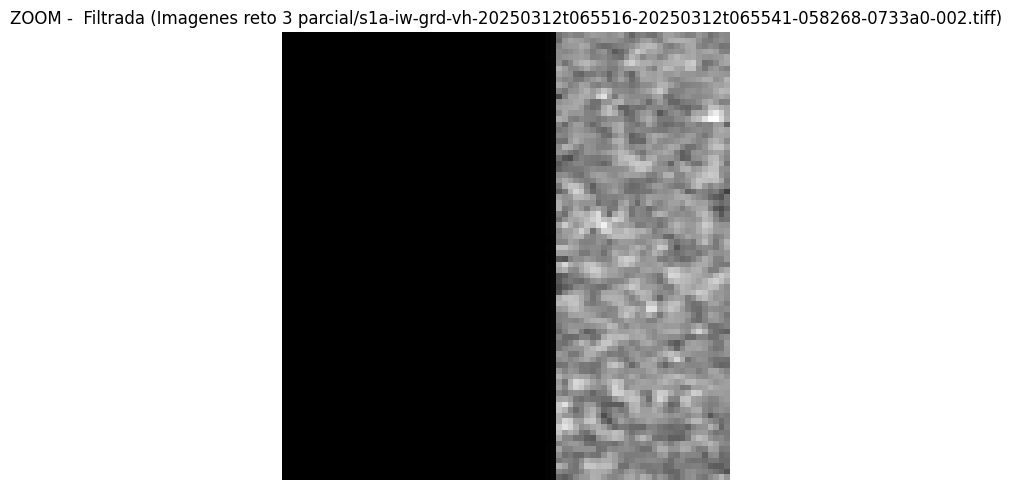

In [ ]:
# Mostrar ZOOM solo en la imagen filtrada (Lee) de cada imagen procesada
for nombre in imagenes:
    print(f'\nZOOM sobre regi√≥n de inter√©s - {nombre}')

    path_filtrada = os.path.join(basepath, nombre.replace('.tiff', '_filtrada.tiff'))
    img_filtrada = cv2.imread(path_filtrada, cv2.IMREAD_UNCHANGED)

    if img_filtrada is None:
        print(' No se pudo cargar la imagen filtrada.')
        continue

    # Coordenadas y tama√±o
    x_ini, y_ini = 200, 200
    ancho, alto = 80, 80

    roi = img_filtrada[y_ini:y_ini+alto, x_ini:x_ini+ancho]

    plt.figure(figsize=(5, 5))
    plt.imshow(roi, cmap='gray')
    plt.title(f'ZOOM -  Filtrada ({nombre})')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

    # Liberar memoria
    plt.close('all')
    del img_filtrada, roi
    gc.collect()
